## Task 1: Predicting the Percentage of marks of an Student based on the number of study hours


#### Importing Neccessary Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing dataset 
data_url='http://bit.ly/w-data'
data=pd.read_csv(data_url)
print("Data set imported")

Data set imported


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape

(25, 2)

In [ ]:
#plotting graph for finding relation between both variables

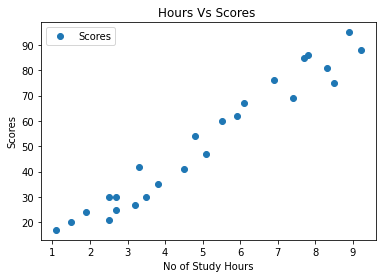

In [15]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title("Hours Vs Scores ")
plt.xlabel('No of Study Hours')
plt.ylabel('Scores')
plt.show()

In [60]:
#Preparing data for model training
X = data.iloc[:, :1].values  
y = data.iloc[:, -1].values  


In [61]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [62]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [63]:
#spliting dataset for model training using sklearn library
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [64]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [65]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [66]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [67]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [77]:
#training Linear Regression model
from sklearn.linear_model import LinearRegression  
lrmodel=LinearRegression() 
lrmodel.fit(X_train,y_train)
print("Model Training Done.")

Model Training Done.


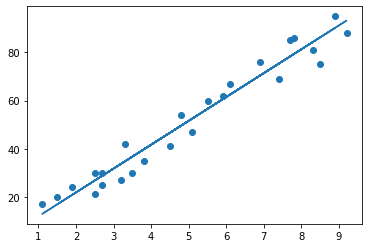

In [80]:
# Plotting the regression line
line = lrmodel.coef_*X+lrmodel.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [81]:
#prediting data using X test data
y_pred=lrmodel.predict(X_test)

In [82]:
y_pred #predicted Score based on test Study Hours

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [83]:
#comparing actual Score with Predicted Score
comp_data=pd.DataFrame({'Actual_Score':y_test,'Predicted_Score':y_pred})

In [84]:
comp_data

,Actual_Score,Predicted_Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [85]:
# testing model with user specified hours
user_hours=9.25                  #no of hours study
user_pred=lrmodel.predict([[user_hours]])
print("No of Hours =",user_hours)
print('Predicted Score for User_hours =',user_pred)

No of Hours = 9.25
Predicted Score for User_hours = [93.69173249]


In [86]:
#Checking the accuracy of predicted data with actual data using mena absolute error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.18385989900298
